# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Pseudorandom Noise Ambiguity Function
***

Referring to Section 8.7.3, pseudorandom number (PRN) coded waveforms are binary phase-coded waveforms where the phase state is determined by a sequence of $0$s and $1$s based on a PRN sequence.  PRN waveforms appear similar to noise and satisfy one or more of the standard tests for statistical randomness.  However, PRN codes have a deterministic sequence that repeats after its period.  A type of PRN sequence commonly used in radar applications is the ***maximum length sequence***.  These are sequences generated using maximal linear feedback shift registers, as shown in Figure 8.22.  The generation of a maximum length sequence consists of the following steps:


1. Initialize the register with any sequence except all $0$s.
2. Perform modulo $2$ addition and place the result in the storage buffer.
3. Shift the contents of the register one bit to the right.
4. Store the contents of bit $N$ in an output buffer.
5. Load the contents of the storage buffer into bit 1 of the register.
6. Repeat Steps 2-5 until the output buffer contains $2^N$--$1$ bits.


These sequences are periodic and reproduce every binary sequence that can be represented by the shift registers.  For a register of length $N$, the sequence is of length $2^N-1$. The feedback connections shown in Figure 8.22 determine whether or not the sequence will be maximum length.  Only certain feedback configurations lead to a maximum length sequence, as given in Table 8.2.  Table 8.2 is not a comprehensive list of feedback connections and more combinations may exist for a given register.  However, the number of different feedback combinations becomes very large as the number of bits in the register increases.
***

Begin by getting the library path

In [1]:
import lib_path

Set the register length (2 - 10) and the chip width (s)

In [2]:
register_length = 4

chip_width = 0.1

Ensure the register length is between 2 and 10

In [3]:
if register_length < 2:

    register_length = 2


if register_length > 10:

    register_length = 10

Get the feedback taps based on the register length

In [4]:
if register_length == 2:

    feedback_taps = [2, 1]

elif register_length == 3:

    feedback_taps = [3, 2]

elif register_length == 4:

    feedback_taps = [4, 3]

elif register_length == 5:

    feedback_taps = [5, 3]

elif register_length == 6:

    feedback_taps = [6, 5]

elif register_length == 7:

    feedback_taps = [7, 6]

elif register_length == 8:

    feedback_taps = [8, 6, 5, 4]

elif register_length == 9:

    feedback_taps = [9, 5]

elif register_length == 10:

    feedback_taps = [10, 7]

Generate a maximum length sequence

In [5]:
from Libs.ambiguity.prn_code import mls

code = mls(register_length, feedback_taps)

Calculate the ambiguity function for the PRN code

In [6]:
from Libs.ambiguity.ambiguity_function import phase_coded_wf


ambiguity, time_delay, doppler_frequency = phase_coded_wf(code, chip_width)

Display the zero-Doppler cut, the zero-range cut, and the 2D contour plot using the `matplotlib` routines

Text(0.5, 1.0, 'PRN Ambiguity Function')

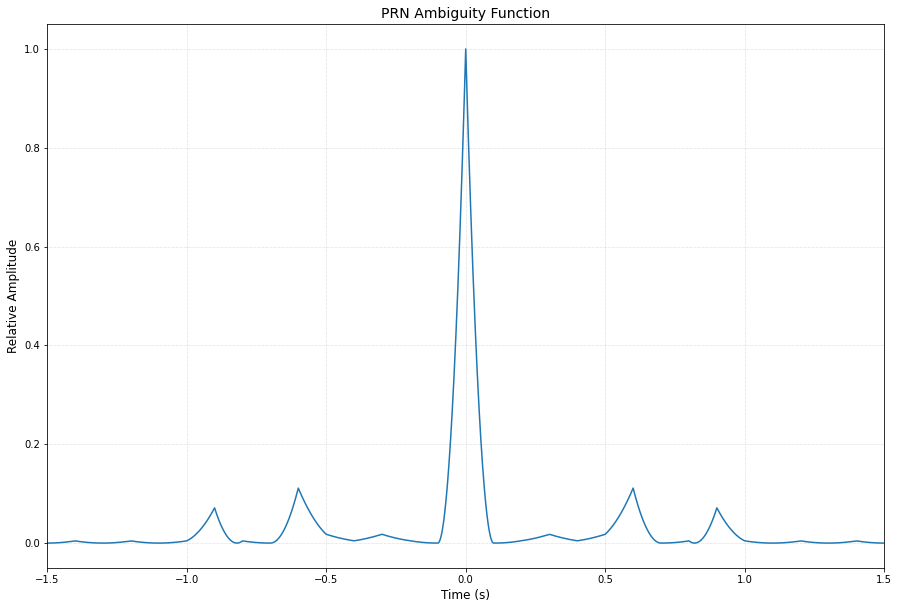

In [7]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Plot the ambiguity function

plt.plot(time_delay, ambiguity[round(len(doppler_frequency) / 2)], '')



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title

plt.title('PRN Ambiguity Function', size=14)

The zero-range cut

Text(0.5, 1.0, 'PRN Ambiguity Function')

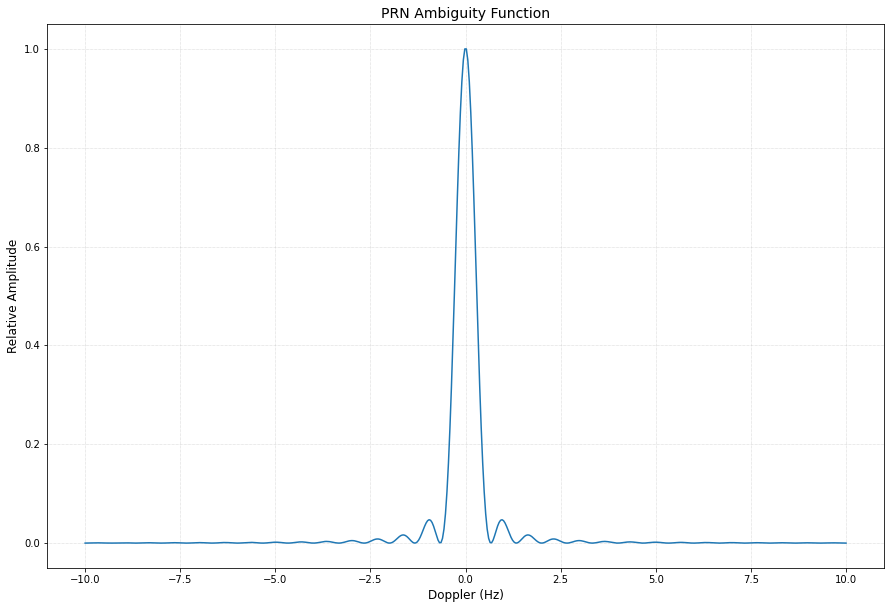

In [8]:
# Plot the ambiguity function

plt.plot(doppler_frequency,  ambiguity[:, round(len(time_delay) / 2)], '')



# Set the x and y axis labels

plt.xlabel("Doppler (Hz)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title

plt.title('PRN Ambiguity Function', size=14)

The two-dimensional contour plot

Text(0.5, 1.0, 'PRN Ambiguity Function')

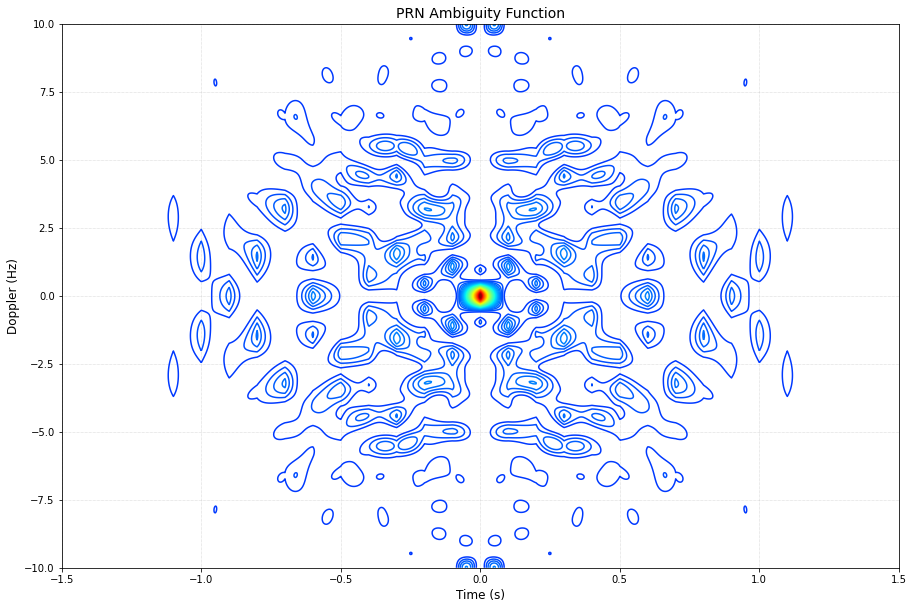

In [9]:
from numpy import meshgrid


# Create the grid

t, f = meshgrid(time_delay, doppler_frequency)



# Plot the ambiguity function

plt.contour(t, f, ambiguity, 50, cmap='jet', vmin=-0.2, vmax=1.0)



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Doppler (Hz)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title

plt.title('PRN Ambiguity Function', size=14)